In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("drive/MyDrive/assdata/train.csv")
test = pd.read_csv("drive/MyDrive/assdata/test.csv")

In [10]:
data.head()

,row ID,n_tokens_title,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,...,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popularity
0,Row0,12,4,2,1,0,4.680365,5,0,1,...,0,0.521617,0.092562,0.045662,0.013699,0.500000,-0.187500,0.000000,0.187500,Low
1,Row1,9,3,1,1,0,4.913725,4,0,0,...,0,0.341246,0.148948,0.043137,0.015686,0.000000,0.000000,0.500000,0.000000,Low
2,Row2,9,3,1,1,0,4.393365,6,0,0,...,0,0.702222,0.323333,0.056872,0.009479,0.000000,0.000000,0.500000,0.000000,Low
3,Row3,9,9,0,1,0,4.404896,7,0,1,...,0,0.429850,0.100705,0.041431,0.020716,0.000000,0.000000,0.500000,0.000000,Low
4,Row4,13,19,19,20,0,4.682836,7,0,0,...,0,0.513502,0.281003,0.074627,0.012127,0.454545,0.136364,0.045455,0.136364,Low


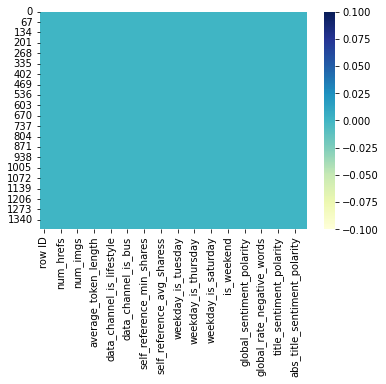

In [11]:
sns.heatmap(data.isna(), cmap="YlGnBu")
# No missing values 

In [12]:
data.corr()
# No significantly strong correlation between attributes

,n_tokens_title,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
n_tokens_title,1.000000,-0.093883,-0.021491,-0.033327,0.028458,-0.084110,-0.018327,-0.046194,0.053996,0.080872,...,0.051110,0.060933,-0.050782,0.002453,0.051415,0.004482,0.126073,0.046954,-0.132524,0.083941
num_hrefs,-0.093883,1.000000,0.557280,0.411210,-0.033578,0.180572,0.136032,0.050049,-0.075663,-0.112399,...,0.005061,0.063382,0.166901,0.127923,0.072277,-0.035307,0.030462,-0.008821,0.038377,0.025922
num_self_hrefs,-0.021491,0.557280,1.000000,0.485827,0.025868,0.042427,0.156508,0.004988,-0.020658,-0.119018,...,-0.022426,0.045745,0.097363,0.174803,0.225244,-0.016779,0.001968,-0.027394,-0.008864,-0.037361
num_imgs,-0.033327,0.411210,0.485827,1.000000,-0.094865,-0.024192,0.123849,0.024031,-0.048999,-0.151163,...,0.025836,0.062648,0.106403,0.134911,0.107237,-0.035675,0.044209,-0.008761,0.001695,0.020971
num_videos,0.028458,-0.033578,0.025868,-0.094865,1.000000,-0.045416,0.033244,-0.066201,0.031106,0.011297,...,0.019730,0.012366,0.045652,-0.058207,0.083376,0.213878,0.108150,0.064647,-0.084973,0.087000
average_token_length,-0.084110,0.180572,0.042427,-0.024192,-0.045416,1.000000,-0.071828,-0.039268,-0.070504,0.014321,...,-0.067321,-0.079592,0.288276,0.098107,0.128510,0.058157,-0.044869,-0.034307,0.064979,-0.065568
num_keywords,-0.018327,0.136032,0.156508,0.123849,0.033244,-0.071828,1.000000,0.220006,0.030559,-0.117480,...,0.140851,0.182838,0.055785,0.138377,0.077053,-0.066213,0.042510,0.034770,-0.061912,0.047105
data_channel_is_lifestyle,-0.046194,0.050049,0.004988,0.024031,-0.066201,-0.039268,0.220006,1.000000,-0.133587,-0.145915,...,0.010204,-0.018289,0.017289,0.062549,0.008979,-0.039270,-0.032431,0.032152,-0.001366,-0.016093
data_channel_is_entertainment,0.053996,-0.075663,-0.020658,-0.048999,0.031106,-0.070504,0.030559,-0.133587,1.000000,-0.197090,...,0.053010,0.047268,-0.011595,0.065300,0.041456,-0.052384,0.010661,0.002741,-0.032727,0.030212
data_channel_is_bus,0.080872,-0.112399,-0.119018,-0.151163,0.011297,0.014321,-0.117480,-0.145915,-0.197090,1.000000,...,-0.038143,-0.052267,-0.116599,-0.005551,0.027100,-0.060837,0.014750,-0.007917,-0.075831,-0.014768


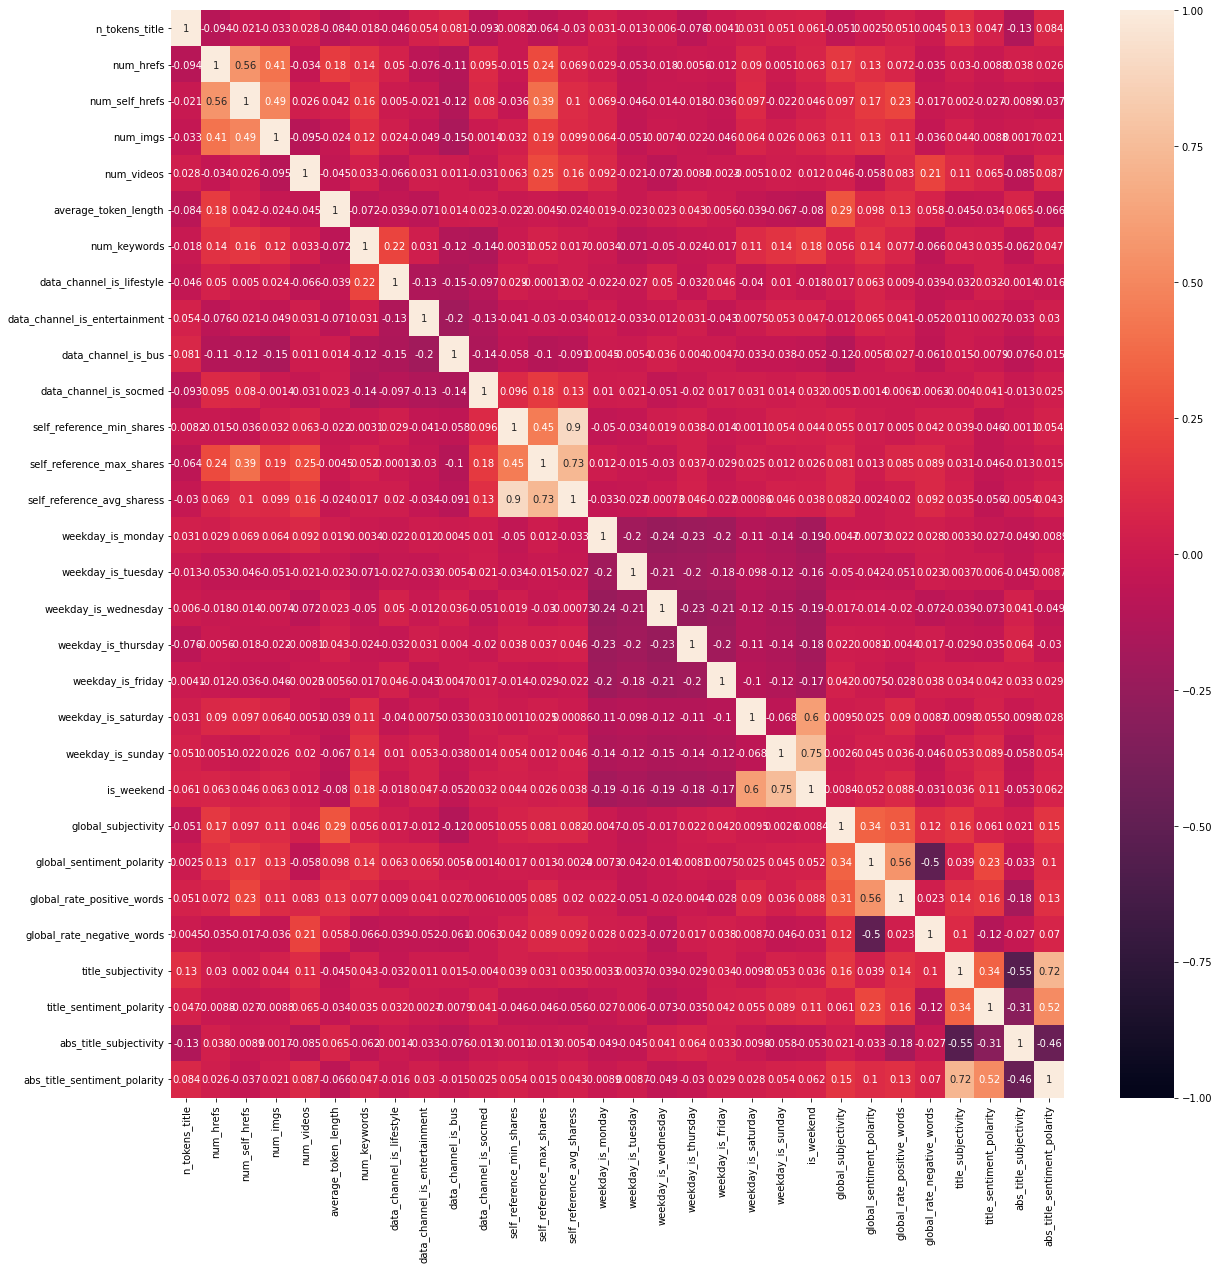

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


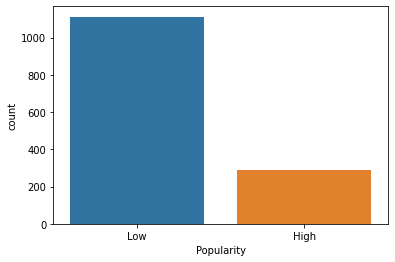

In [18]:
sns.countplot(data["Popularity"])

In [22]:
y = pd.get_dummies(data["Popularity"], drop_first=True)
X = data.drop(["row ID","Popularity"], axis=1)

In [23]:
y.head()

,Low
0,1
1,1
2,1
3,1
4,1


In [24]:
X.head()

,n_tokens_title,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,4,2,1,0,4.680365,5,0,1,0,...,0,0,0.521617,0.092562,0.045662,0.013699,0.500000,-0.187500,0.000000,0.187500
1,9,3,1,1,0,4.913725,4,0,0,1,...,0,0,0.341246,0.148948,0.043137,0.015686,0.000000,0.000000,0.500000,0.000000
2,9,3,1,1,0,4.393365,6,0,0,1,...,0,0,0.702222,0.323333,0.056872,0.009479,0.000000,0.000000,0.500000,0.000000
3,9,9,0,1,0,4.404896,7,0,1,0,...,0,0,0.429850,0.100705,0.041431,0.020716,0.000000,0.000000,0.500000,0.000000
4,13,19,19,20,0,4.682836,7,0,0,0,...,0,0,0.513502,0.281003,0.074627,0.012127,0.454545,0.136364,0.045455,0.136364


In [4]:
X_test = test.drop(["row ID"], axis=1)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.90, random_state = 0)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(1260, 30)
(140, 30)
(1260, 1)
(140, 1)


In [6]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8844621513944223

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Best leaf_size: 1
Best p: 1
Best n_neighbors: 27


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [7]:
knn = KNeighborsClassifier(leaf_size =1, n_neighbors=27, p=1)
knn.fit(X_train, y_train)
f1_score(y_val, knn.predict(X_val))


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8844621513944223

In [27]:
print(classification_report(y_val, knn.predict(X_val)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.80      1.00      0.89       112

    accuracy                           0.80       140
   macro avg       0.40      0.50      0.44       140
weighted avg       0.64      0.80      0.71       140



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from yellowbrick.classifier import ClassificationReport

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


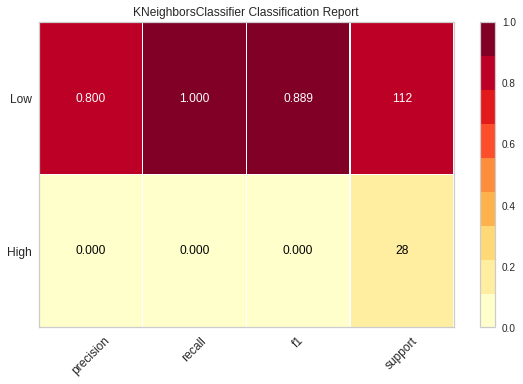

In [30]:
classes = ["High","Low"]
visualizer = ClassificationReport(knn, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_val, y_val)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [8]:
knn.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(leaf_size=1, n_neighbors=27, p=1)

In [9]:
predict8 = pd.DataFrame({"Popularity":knn.predict(X_test)})
submit8 = pd.concat([test["row ID"], predict8["Popularity"]], axis=1, keys=['row ID','Popularity'])
submit8["Popularity"] = submit8["Popularity"].replace([1, 0], ["Low","High"])
print(submit8.head())
print(submit8.shape)
submit8.to_csv('submit8.csv')

  row ID Popularity
0   Row7        Low
1  Row11        Low
2  Row14        Low
3  Row15        Low
4  Row18        Low
(600, 2)
